## Предсказание результата экзамена по привычкам студента

### Импорт библиотек

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Загрузка датасета

In [5]:
df = pd.read_csv('C:\\Users\\noutb\\Downloads\\student_habits_performance.csv')

In [6]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,S2446,22,Male,2.1,4.1,3.4,Yes,65.3,4.5,Poor,1,High School,Poor,2,No,36.9
1347,S2447,24,Female,7.2,3.8,3.0,No,81.6,6.4,Fair,4,Bachelor,Poor,6,No,63.8
1348,S2448,20,Male,4.4,2.2,1.6,No,89.0,7.6,Good,5,Master,Good,8,No,84.7
1349,S2449,21,Female,7.8,3.6,2.9,Yes,62.5,5.2,Fair,3,High School,Poor,5,No,48.3


* age – Возраст студента.

* gender – Пол студента.

* study_hours_per_day – Количество часов, посвящаемых учёбе в день.

* social_media_hours – Количество часов, проводимых в социальных сетях в день.

* netflix_hours – Количество часов, проводимых за просмотром Netflix (стриминговых сервисов) в день.

* part_time_job – Наличие подработки (Да/Нет).

* attendance_percentage – Процент посещаемости занятий.

* sleep_hours – Продолжительность сна в сутки (в часах).

* diet_quality – Качество питания  ( Плохое, Среднее, Хорошее).

* exercise_frequency – Частота физических упражнений (в неделю).

* parental_education_level – Уровень образования родителей.

* internet_quality – Качество интернет-соединения.

* mental_health_rating – Самооценка психического здоровья (от 1 до 10).

* extracurricular_participation – Участие во внеучебной деятельности (Да/Нет).

* exam_score – Результат экзамена (баллы).

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1351 non-null   object 
 1   age                            1351 non-null   int64  
 2   gender                         1351 non-null   object 
 3   study_hours_per_day            1351 non-null   float64
 4   social_media_hours             1351 non-null   float64
 5   netflix_hours                  1351 non-null   float64
 6   part_time_job                  1351 non-null   object 
 7   attendance_percentage          1351 non-null   float64
 8   sleep_hours                    1351 non-null   float64
 9   diet_quality                   1351 non-null   object 
 10  exercise_frequency             1351 non-null   int64  
 11  parental_education_level       1260 non-null   object 
 12  internet_quality               1351 non-null   o

Датасет содержит 16 столбцов и 1351 строка, содержит такие типы данных как float64(6), int64(3), object(7). В столбце parental_education_level есть пропущенные значения

In [10]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
student_id,1351,1351,S1000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1351.0,NaN,NaN,NaN,20.603997,2.199855,17.0,19.0,21.0,22.0,24.0
gender,1351,3,Female,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
study_hours_per_day,1351.0,NaN,NaN,NaN,3.979941,1.910673,0.0,2.6,3.8,5.05,8.7
social_media_hours,1351.0,NaN,NaN,NaN,2.430792,1.287052,0.0,1.5,2.4,3.3,7.2
netflix_hours,1351.0,NaN,NaN,NaN,1.781347,1.135276,0.0,0.9,1.7,2.6,5.4
part_time_job,1351,2,No,1032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attendance_percentage,1351.0,NaN,NaN,NaN,83.821318,12.018511,30.5,77.5,85.2,92.5,100.0
sleep_hours,1351.0,NaN,NaN,NaN,6.591636,1.425325,2.5,5.6,6.6,7.6,10.0
diet_quality,1351,3,Good,549,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В датасете представлена информация о студентах возрастом от 17 до 24 лет, женщины, мужчины и иной тип.
    
Часы учебы от 0 до 8 часов в сутки

Время в соцсетях от 0 до 7 часов в день

Время в онлайн кинотеатрах(нетфликс) от 0 до 5 часов в день

Есть ли подработка - да или нет

Процент посещаемости от 56 до 100 %

Количество часов сна в день от 3 до 10

Качество диеты - 3 типа, самый частый - среднее

Частота физичемских упражнений в неделю от 0 до 6 раз

Тип образования родителя - 3 вида, самый частый - High School

Качество интернета - 3 типа, самый частый - Хорошее

Рейтинг ментального здоровья от 1 до 10

Участие во внеучебной деятельности - да или нет, чаще - нет

Результат экзамена от 18 до 100 баллов

In [12]:
df.isna().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

В столбце parental_education_level 91 пропущенное значение

In [14]:
# уберем столбец с индексом студента
df = df.drop(columns ="student_id", axis= 1)

In [15]:
df["parental_education_level"].unique()

array(['Master', 'High School', 'Bachelor', nan], dtype=object)

In [16]:
df[df["parental_education_level"].isna()]

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
10,19,Female,4.6,3.7,0.8,No,77.6,5.8,Fair,1,NaN,Good,3,No,63.3
33,18,Female,4.0,0.9,1.1,No,99.5,5.8,Poor,2,NaN,Average,5,No,70.7
47,23,Female,2.5,2.9,2.7,No,83.5,7.0,Good,4,NaN,Good,8,Yes,59.7
74,21,Female,2.3,1.0,0.4,No,100.0,6.4,Fair,6,NaN,Good,1,No,66.9
93,22,Male,4.1,2.5,3.0,No,85.1,5.8,Good,4,NaN,Good,5,No,70.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,23,Female,4.4,2.7,1.0,No,79.8,6.1,Fair,6,NaN,Average,3,No,85.4
925,19,Other,1.7,2.9,1.6,Yes,97.3,8.7,Good,1,NaN,Good,7,No,53.6
939,18,Female,4.7,3.2,1.9,No,75.2,5.4,Good,3,NaN,Good,6,No,71.0
945,23,Male,6.0,2.9,2.1,Yes,98.9,6.4,Poor,0,NaN,Average,7,No,100.0


Строк с пропущенными значениями слишком много относительно всего размера датасета и все остальные признаки в них обычные. Примем пропуски за неизвестное значение и заполним.

In [18]:
df['parental_education_level'] = df['parental_education_level'].fillna('Unknown')

In [19]:
df["gender"].value_counts()


gender
Female    658
Male      651
Other      42
Name: count, dtype: int64

In [20]:
df.isna().sum()

age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [21]:
df.duplicated().sum()

10

In [22]:
cat_col = df.select_dtypes(include='object').columns
cat_col = [col for col in cat_col]
cat_col

['gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation']

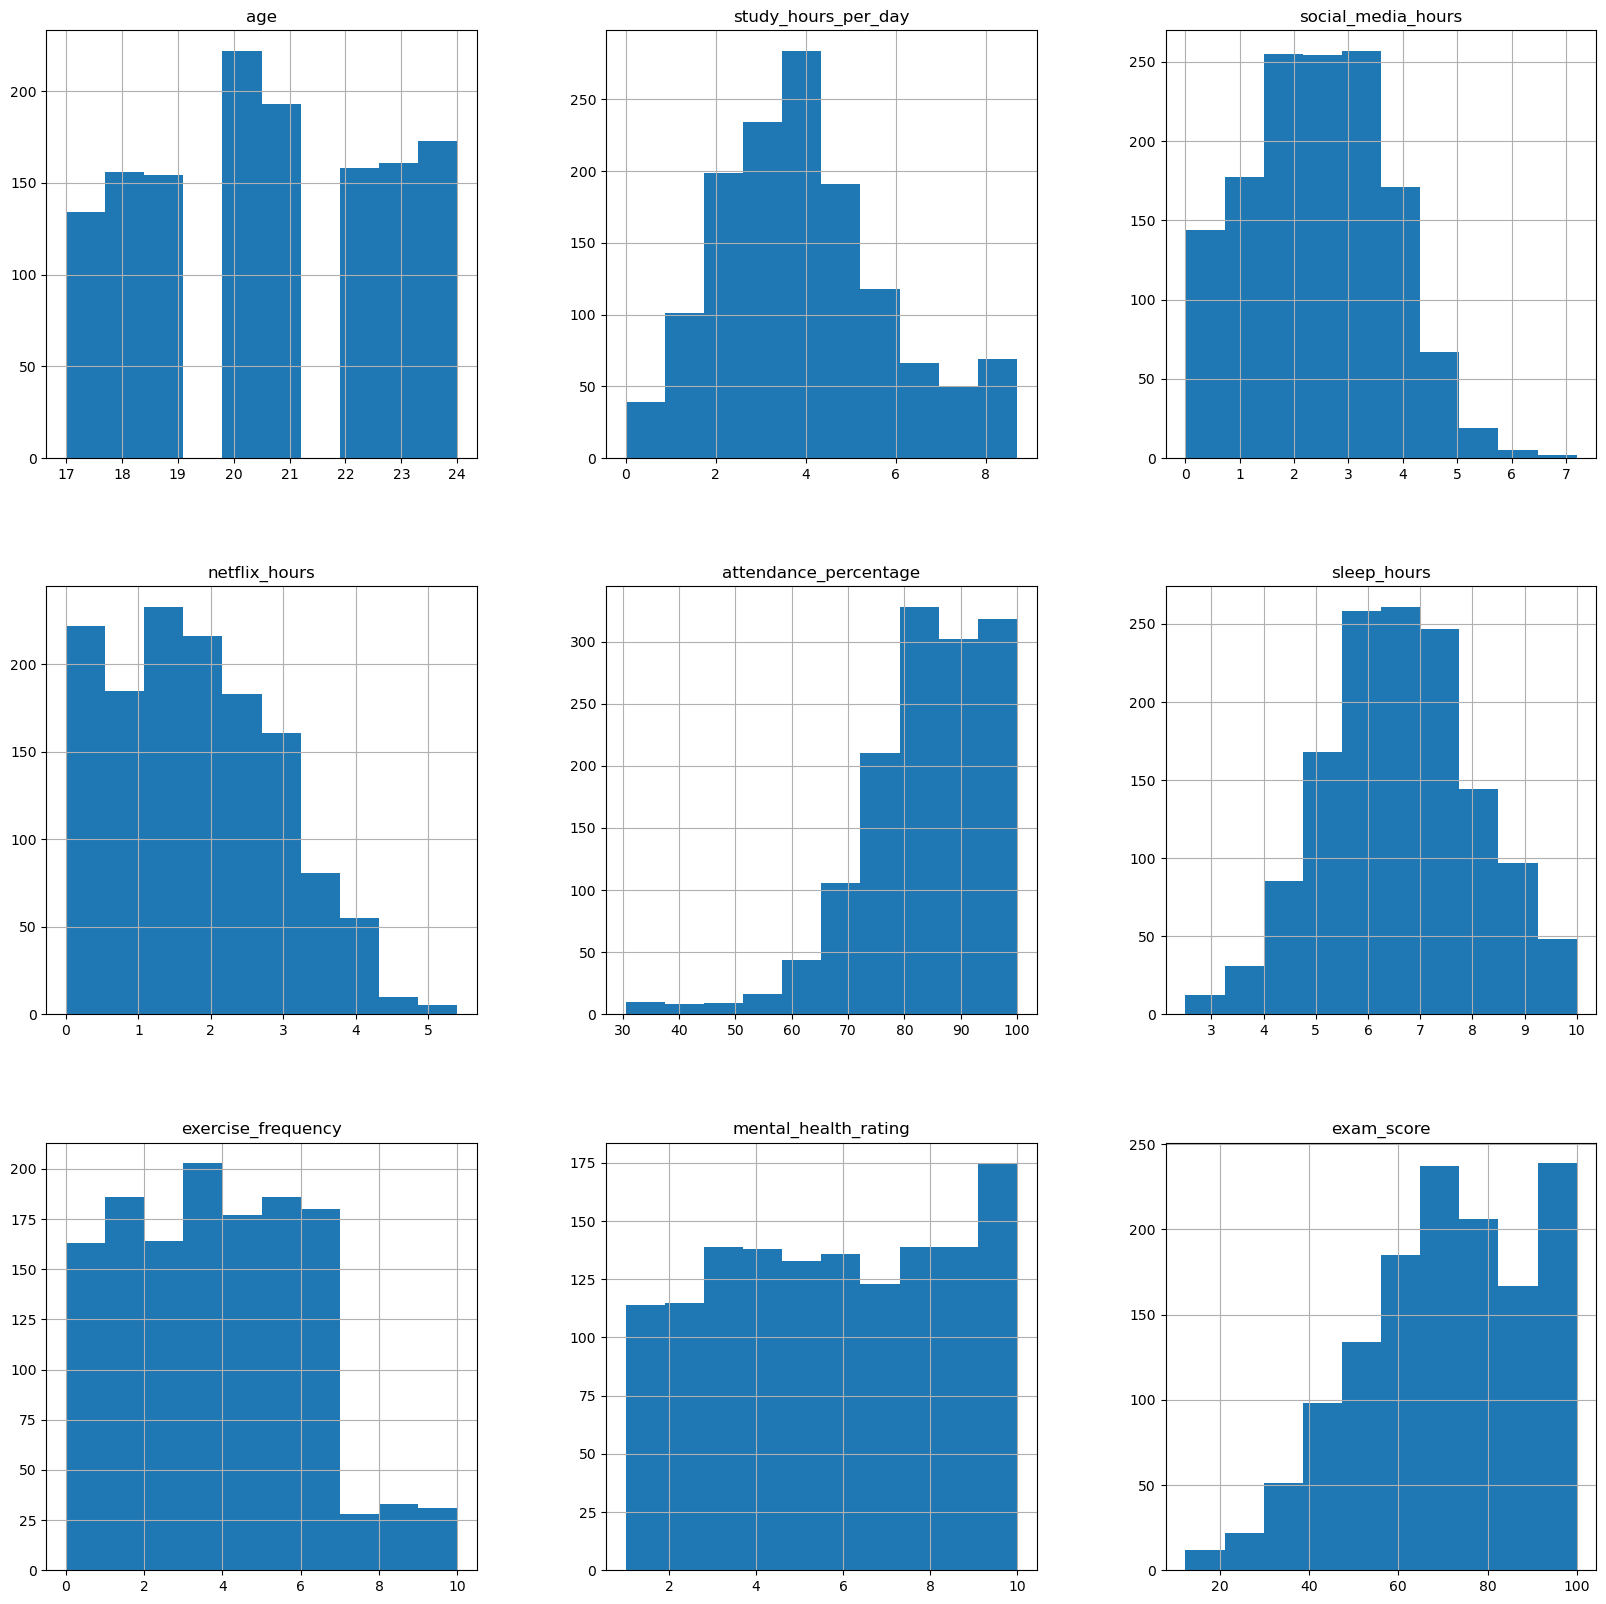

In [23]:
df.hist(figsize=(20,20));
plt.show()

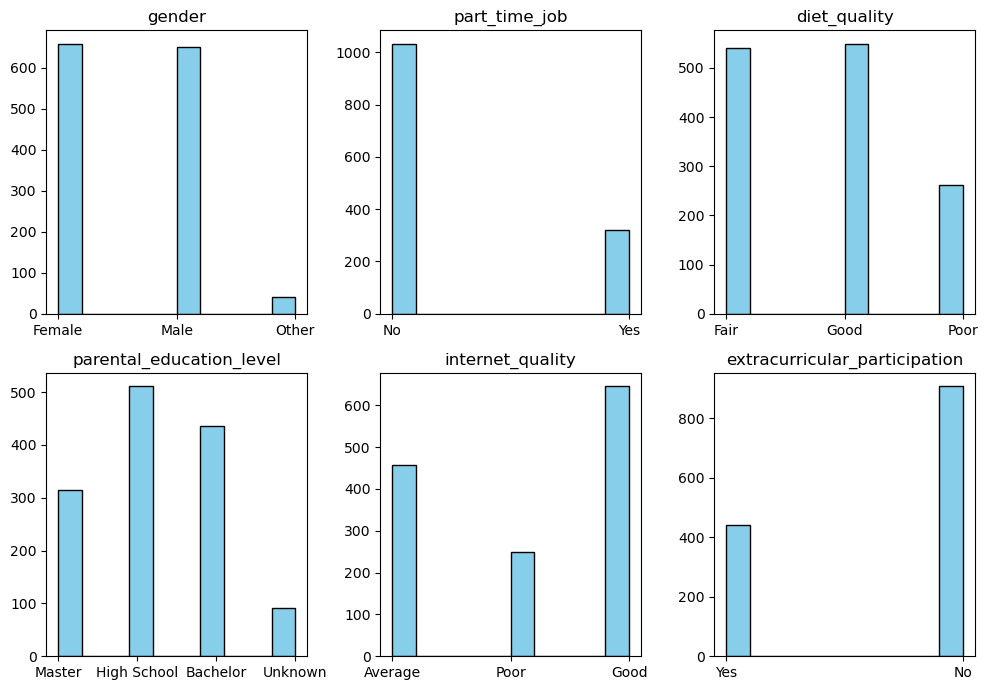

In [24]:
plt.figure(figsize=(10,7))
for i in range(6):
    plt.subplot(2, 3, i+1) 
    plt.hist(df[cat_col[i]], color='skyblue', edgecolor='black')
    plt.title(f'{cat_col[i]}')
    
plt.tight_layout()
plt.show() 

Мужчин и женщин примерно равное количество, у большинства нет подработок, среднее питание хороший интернет и они не участвуют во внеклассной деятельности.

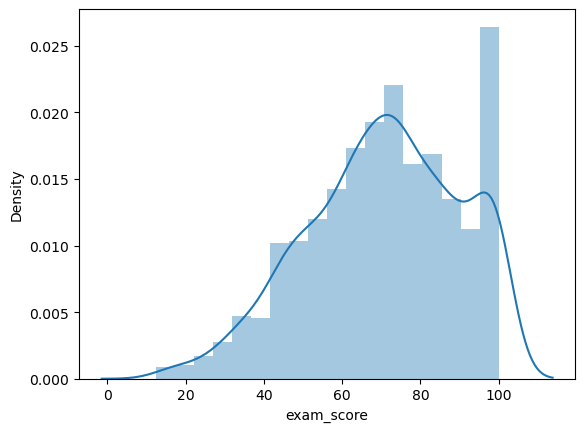

In [26]:
sns.distplot(df['exam_score'])
plt.show()

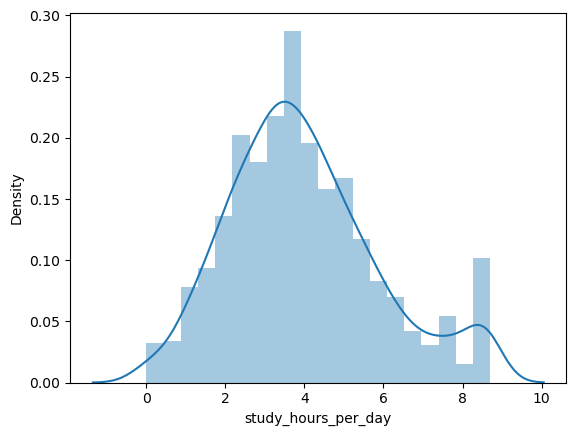

In [27]:
sns.distplot(df['study_hours_per_day'])
plt.show()

Количество часов обучения близко к нормальному распределению

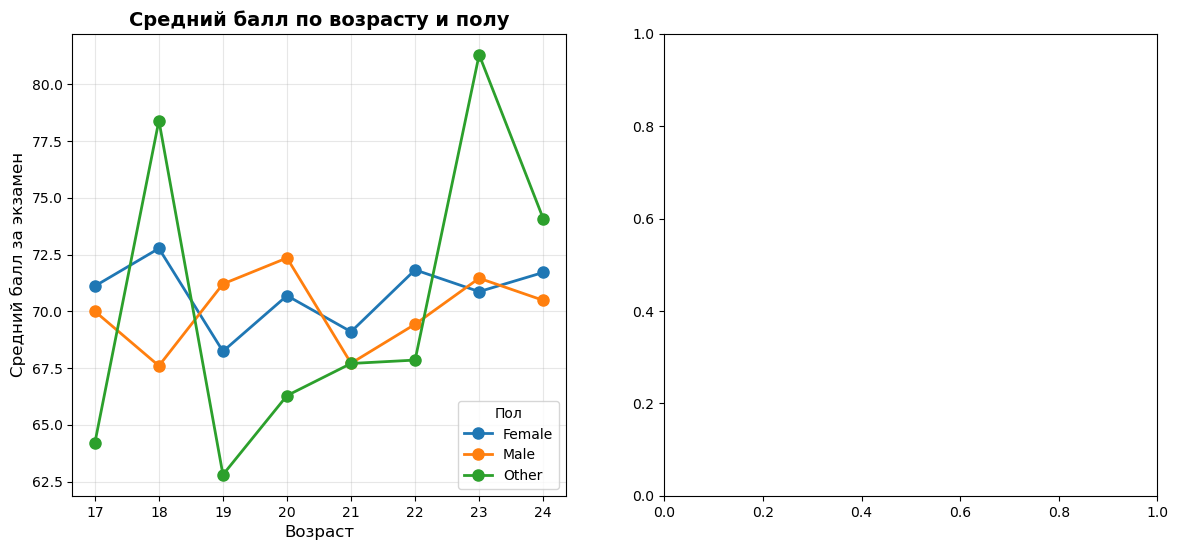

In [29]:
fig2, axes2 = plt.subplots(1, 2, figsize=(14, 6))

for gender in df['gender'].unique():
    gender_data = df[df['gender'] == gender]
    age_group = gender_data.groupby('age')['exam_score'].mean().reset_index()
    axes2[0].plot(age_group['age'], age_group['exam_score'], 
                  marker='o', linewidth=2, markersize=8, label=gender)

axes2[0].set_title('Средний балл по возрасту и полу', fontsize=14, fontweight='bold')
axes2[0].set_xlabel('Возраст', fontsize=12)
axes2[0].set_ylabel('Средний балл за экзамен', fontsize=12)
axes2[0].legend(title='Пол')
axes2[0].grid(True, alpha=0.3)
plt.show()

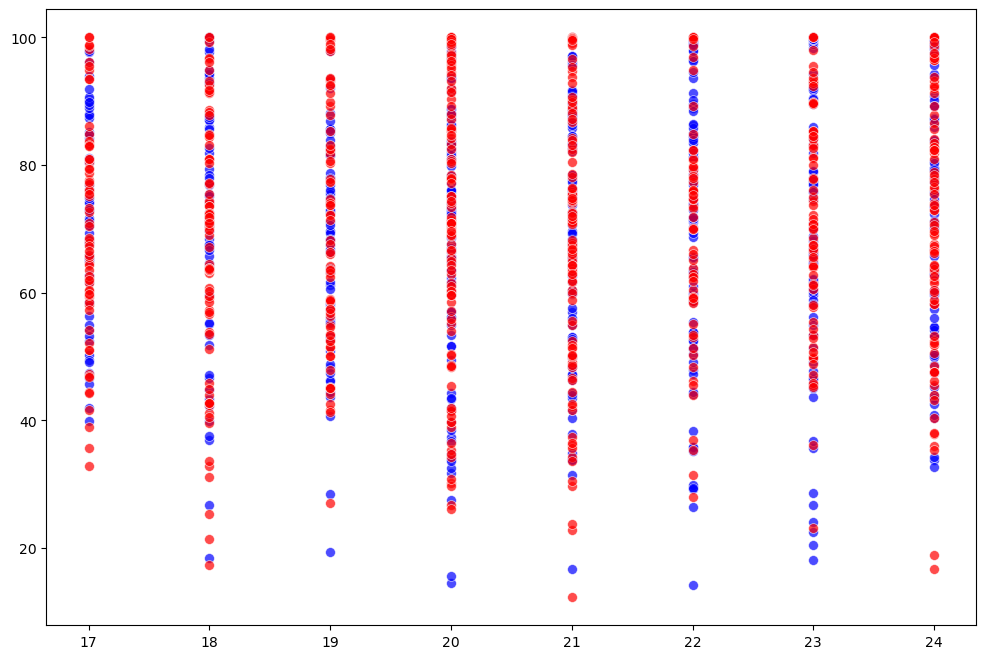

In [30]:
plt.figure(figsize=(12, 8))


female_mask = df['gender'] == 'Female'
male_mask = df['gender'] == 'Male'


plt.scatter(df.loc[female_mask, 'age'], df.loc[female_mask, 'exam_score'],
           alpha=0.7, s=50, c='blue', marker='o', label='Female', 
           edgecolors='white', linewidth=0.5)

plt.scatter(df.loc[male_mask, 'age'], df.loc[male_mask, 'exam_score'],
           alpha=0.7, s=50, c='red', marker='o', label='Male',
           edgecolors='white', linewidth=0.5)

plt.show()

Что мужчины, что женщины разных возрастов написали экзамен на разное количество баллов

Закодируем категориальные данные и выведем тепловую карту

In [33]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()

for column in cat_col:
    
    le = LabelEncoder()
    
    df_encoded[column] = le.fit_transform(df_encoded[column])

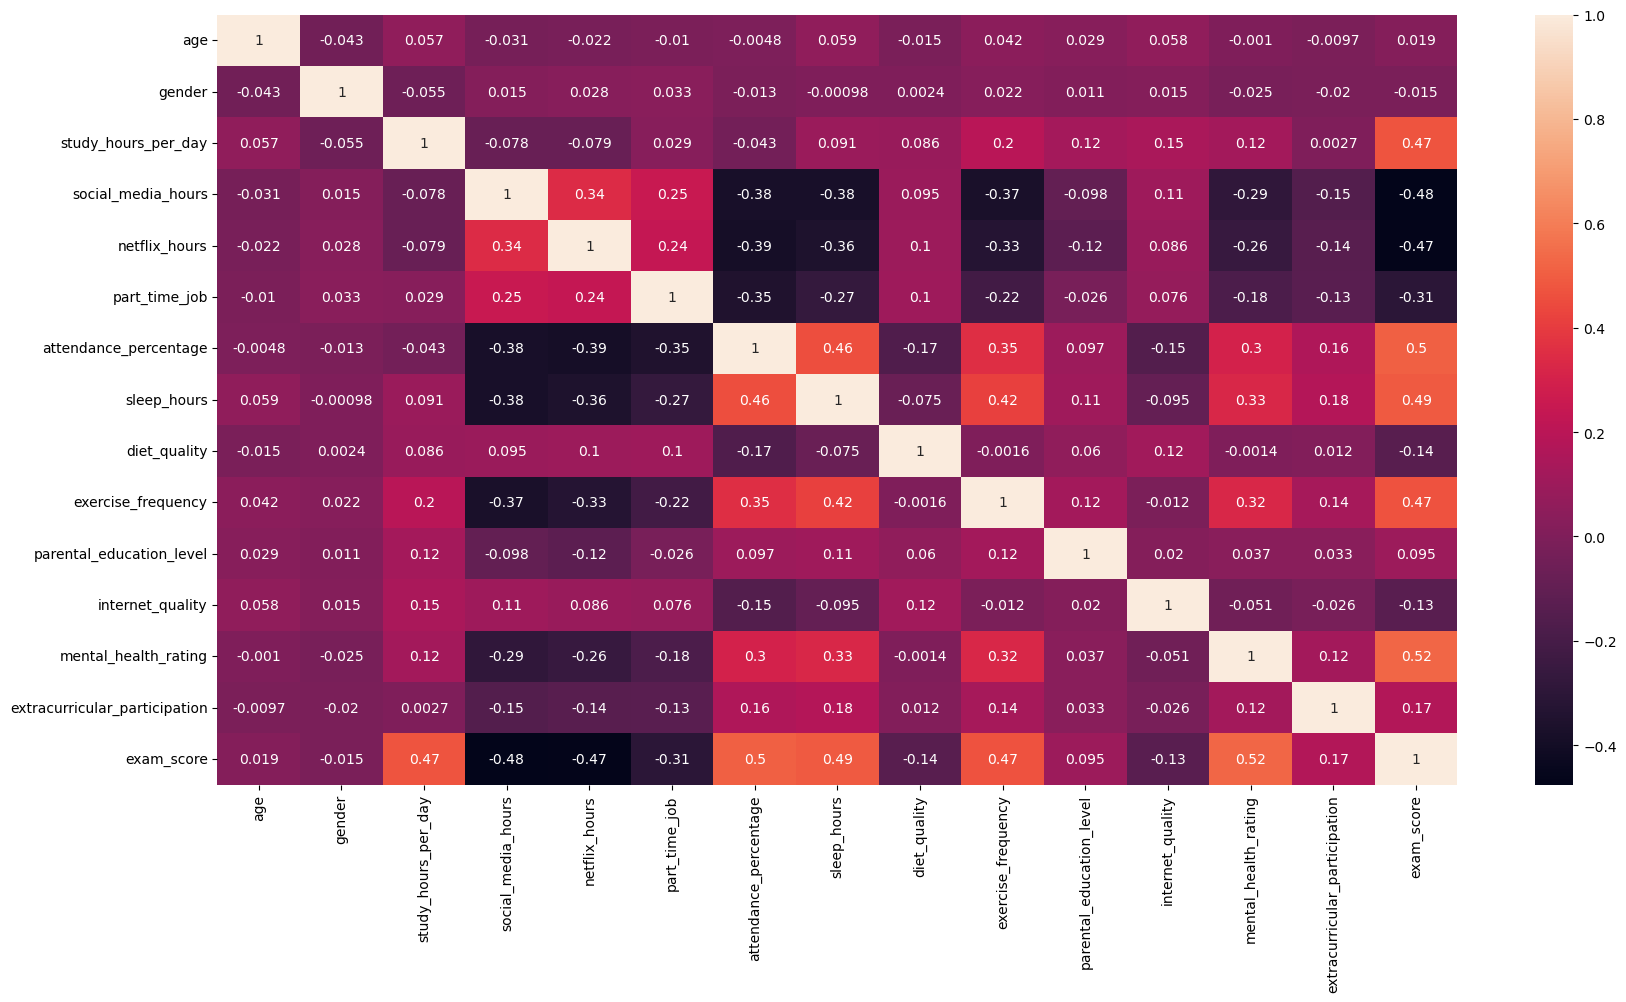

In [34]:
corr = df_encoded.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
plt.show()

Присутствует зависимость между часами учебы и результатом экзамена, процентом посещения и результатом экзамена, часами сна и результатом экзамена, ментальным здоровьем и результатом экзамена

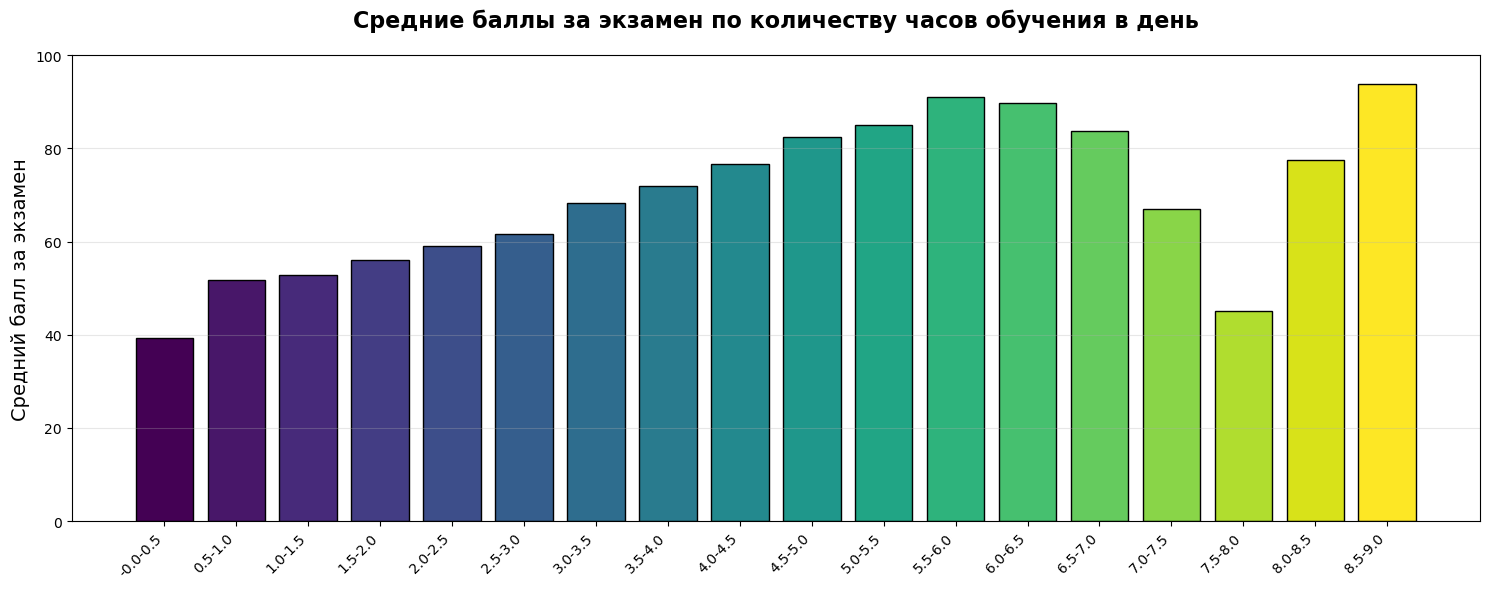

In [36]:
plt.figure(figsize=(15, 6))

df['study_hours_bin'] = pd.cut(df['study_hours_per_day'], 
                                bins=np.arange(0, 9.5, 0.5),  # от 0 до 9 часов
                                include_lowest=True)


group_stats = df.groupby('study_hours_bin')['exam_score'].agg(['mean', 'std', 'count']).reset_index()
group_stats['bin_label'] = group_stats['study_hours_bin'].apply(lambda x: f'{x.left:.1f}-{x.right:.1f}')


bars = plt.bar(range(len(group_stats)), group_stats['mean'], 
               color=plt.cm.viridis(np.linspace(0, 1, len(group_stats))),
               edgecolor='black', linewidth=1)

plt.title('Средние баллы за экзамен по количеству часов обучения в день', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Средний балл за экзамен', fontsize=14)
plt.xticks(range(len(group_stats)), group_stats['bin_label'], rotation=45, ha='right')



plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [37]:
# df_encoded = df_encoded.drop("study_hours_per_day", axis=1)

In [38]:
df_encoded.columns

Index(['age', 'gender', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'part_time_job', 'attendance_percentage',
       'sleep_hours', 'diet_quality', 'exercise_frequency',
       'parental_education_level', 'internet_quality', 'mental_health_rating',
       'extracurricular_participation', 'exam_score'],
      dtype='object')

### Обучение моделей 

#### Разделение выборки

In [41]:

X = df_encoded.drop(["exam_score"], axis=1)

In [42]:
y = df_encoded['exam_score']

In [43]:
X

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation
0,23,0,0.0,1.2,1.1,0,85.0,8.0,0,6,2,0,8,1
1,20,0,6.9,2.8,2.3,0,97.3,4.6,1,6,1,0,8,0
2,21,1,1.4,3.1,1.3,0,94.8,8.0,2,1,1,2,1,0
3,23,0,1.0,3.9,1.0,0,71.0,9.2,2,4,2,1,1,1
4,19,0,5.0,4.4,0.5,0,90.9,4.9,0,3,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,22,1,2.1,4.1,3.4,1,65.3,4.5,2,1,1,2,2,0
1347,24,0,7.2,3.8,3.0,0,81.6,6.4,0,4,0,2,6,0
1348,20,1,4.4,2.2,1.6,0,89.0,7.6,1,5,2,1,8,0
1349,21,0,7.8,3.6,2.9,1,62.5,5.2,0,3,1,2,5,0


In [44]:
non_binary_column =['age',
 'social_media_hours',
 'netflix_hours',
 'attendance_percentage',
 'sleep_hours',
 'exercise_frequency',
 'mental_health_rating',
                   "study_hours_per_day"]

Проводим стандартизацию численных признаков

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_y = StandardScaler()

In [47]:
X_scaled = X.copy()

for column in non_binary_column:
    X_scaled[f'{column}'] = scaler.fit_transform(X[[column]])
    

In [48]:
X_scaled

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation
0,1.089567,0,-2.083776,-0.956642,-0.600382,0,0.098109,0.988466,0,1.132052,2,0,0.779034,1
1,-0.274664,0,1.528854,0.286970,0.457021,0,1.121909,-1.397838,1,1.132052,1,0,0.779034,0
2,0.180080,1,-1.350779,0.520147,-0.424148,0,0.913819,0.988466,2,-1.039778,1,2,-1.644427,0
3,1.089567,0,-1.560206,1.141952,-0.688499,0,-1.067193,1.830691,2,0.263320,2,1,-1.644427,1
4,-0.729408,0,0.534072,1.530581,-1.129084,0,0.589200,-1.187281,0,-0.171046,2,1,-1.644427,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,0.634824,1,-0.984280,1.297404,1.426307,1,-1.541637,-1.468023,2,-1.039778,1,2,-1.298219,0
1347,1.544311,0,1.685925,1.064227,1.073839,0,-0.184893,-0.134500,0,0.263320,0,2,0.086616,0
1348,-0.274664,1,0.219930,-0.179385,-0.159798,0,0.431052,0.707724,1,0.697686,2,1,0.779034,0
1349,0.180080,0,2.000067,0.908775,0.985722,1,-1.774697,-0.976725,0,-0.171046,1,2,-0.259592,0


In [49]:
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

In [50]:
# y_scaled.shape

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

### LinearRegression

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [55]:
%%time
lrm = LinearRegression()
lrm.fit(X_train, y_train)

CPU times: total: 46.9 ms
Wall time: 83.6 ms


LinearRegression()

In [56]:
%%time
predictions = lrm.predict(X_test)

CPU times: total: 0 ns
Wall time: 5.03 ms


In [57]:
predictions

array([-4.44160554e-01, -1.35676760e+00, -3.43218453e-02,  1.40586683e-01,
        4.48695992e-01,  2.40743833e-02,  2.66456753e-02, -9.84437510e-01,
       -8.60664080e-01,  8.62924780e-01, -5.23053817e-02, -6.29422223e-01,
        2.34361139e-01, -1.40348713e+00, -1.22745091e-01, -8.59082341e-01,
        1.35973867e-01,  3.26500312e-02,  8.37901765e-01, -5.41106827e-02,
       -1.83686548e-01,  2.28834028e-01, -1.07677647e+00,  1.45343428e-01,
        5.01828971e-01, -2.37989334e+00, -6.71995273e-02,  1.25498774e+00,
       -7.13531180e-01, -8.69895653e-01, -4.43788718e-01, -4.98261842e-01,
       -8.41361943e-01, -4.96926845e-01,  1.54326940e-01, -9.58280514e-01,
       -4.29111621e-01, -2.48659141e-01, -1.51911300e-01, -1.53772560e+00,
        7.85032970e-01, -3.86095459e-01,  5.73512538e-02, -2.12450402e-01,
       -4.92776282e-01, -7.12842454e-01,  1.09825580e+00,  3.33675354e-01,
        5.91463872e-01, -1.67198494e-01, -5.08626298e-01, -3.51453001e-01,
        3.82579711e-01, -

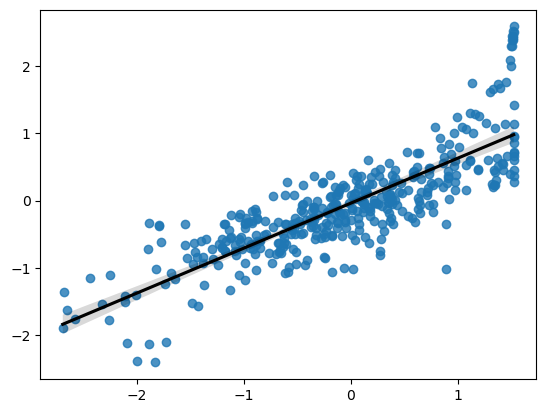

In [58]:
sns.regplot(x=y_test,y=predictions,line_kws={"color":"black"})
plt.show()

In [59]:
r2_lr = metrics.r2_score(y_test, predictions)
r2_lr

0.6706169476886317

In [60]:
metrics.mean_absolute_error(y_test, predictions)

0.4375406290474424

Линейная регрессия показала неплохой результат r2 с небольшой абсолютной ошибкой


In [62]:
predictions_lr2 = lrm.predict(X_scaled)

In [63]:
metrics.r2_score(y_scaled, predictions_lr2)

0.7035750354538284

На полном датасете результат слегка улучшился

### NN

In [66]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [67]:
%time
model = tf.keras.Sequential([
    tf.keras.layers.Dense(14, input_shape=(14,), activation='relu', name='input'),
    tf.keras.layers.Dense(14, activation='relu', name='hidden'),
    tf.keras.layers.Dense(1,  name='output'),
])

CPU times: total: 0 ns
Wall time: 0 ns


In [68]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [69]:
model.compile(loss=tf.keras.losses.mse,
                 optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

In [70]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (Dense)                        │ (None, 14)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden (Dense)                       │ (None, 14)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 435 (1.70 KB)

 Trainable params: 435 (1.70 KB)

 Non-trainable params: 0 (0.00 B)

None


In [71]:
History = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test), callbacks = [early_stop])

Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.0124 - mae: 0.8322 - val_loss: 0.7431 - val_mae: 0.7067
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6607 - mae: 0.6718 - val_loss: 0.5268 - val_mae: 0.5943
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4319 - mae: 0.5282 - val_loss: 0.3866 - val_mae: 0.4938
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3062 - mae: 0.4311 - val_loss: 0.3042 - val_mae: 0.4310
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2501 - mae: 0.3893 - val_loss: 0.2572 - val_mae: 0.3930
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2188 - mae: 0.3632 - val_loss: 0.2277 - val_mae: 0.3679
Epoch 7/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1962 - mae: 0.3435 - val_loss: 0.2081 - val_mae: 0.3510
Epoch 8/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1814 - mae: 0.3291 - val_loss: 0.1984 - val_mae: 0.3447
Epoch 9/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.17

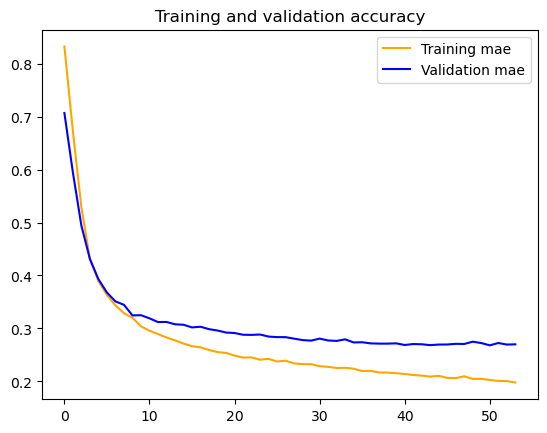

<Figure size 640x480 with 0 Axes>

In [72]:
mae = History.history['mae']
loss = History.history['loss']
val_loss = History.history['val_loss']
val_mae = History.history['val_mae']
epochs = range(len(mae))

plt.plot(epochs, mae, 'orange', label='Training mae')
plt.plot(epochs, val_mae, 'blue', label='Validation mae')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [73]:
predictions_nn = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [74]:
# predictions_nn_sc = scaler_y.inverse_transform(predictions_nn)

In [75]:
r2_nn = metrics.r2_score(y_test, predictions_nn)
r2_nn

0.8575033471007741

In [76]:
metrics.mean_absolute_error(y_test, predictions_nn)

0.27008976848899696

Нейросеть также показывает хороший результат с небольшим значением MAE

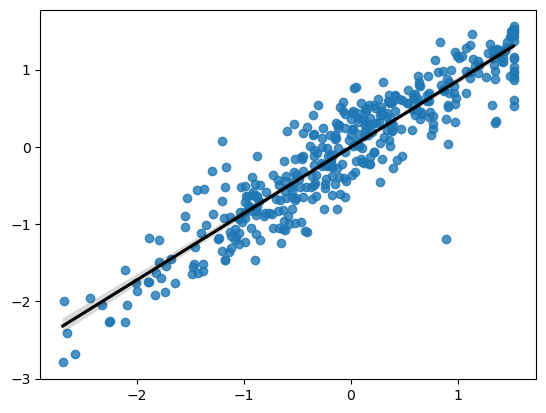

In [78]:
sns.regplot(x=y_test,y=predictions_nn,line_kws={"color":"black"})
plt.show()

In [79]:
# попробуем предсказание на полном датасете
prediction_nn_2 = model.predict(X_scaled)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [80]:
metrics.r2_score(y_scaled, prediction_nn_2)

0.9138236218713258

нейросеть показывает на полном датасете результат лучше 

### GradientBoostingRegressor

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

gbr1 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [84]:
%%time
gbr1.fit(X_train, y_train)

CPU times: total: 328 ms
Wall time: 343 ms


GradientBoostingRegressor(random_state=42)

In [85]:
%%time
gbr_pred1 = gbr1.predict(X_test)

CPU times: total: 0 ns
Wall time: 5 ms


In [86]:
r2_gbr = metrics.r2_score(y_test,gbr_pred1)
r2_gbr

0.8459339411400796

In [87]:
metrics.mean_absolute_error(y_test, gbr_pred1)

0.2627344395724572

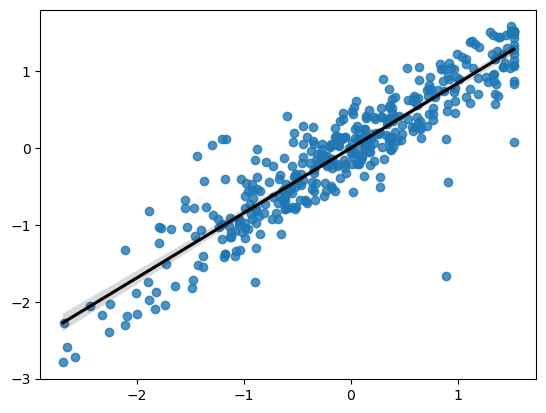

In [88]:
sns.regplot(x=y_test,y=gbr_pred1,line_kws={"color":"black"})
plt.show()

In [89]:
predictions_gbr2 = gbr1.predict(X_scaled)

In [90]:
metrics.r2_score(y_scaled,predictions_gbr2)

0.9192721184533791

### Сравнение моделей

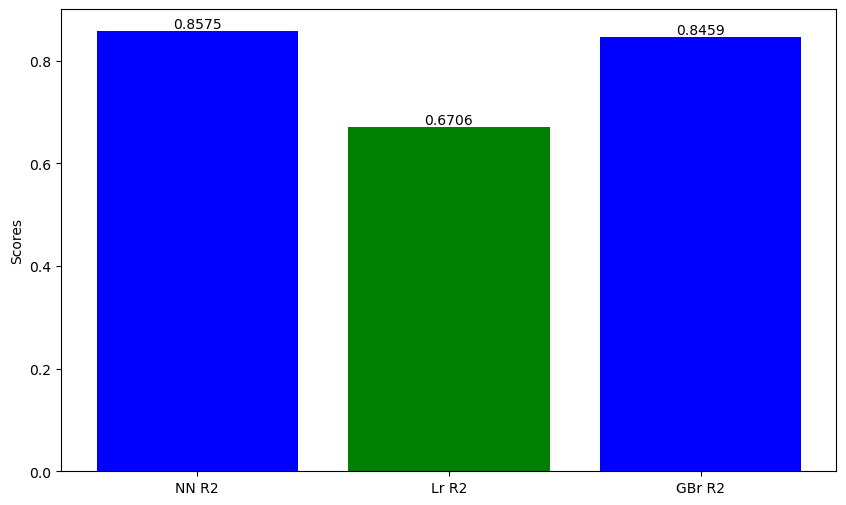

In [92]:
metrics_k = [ 'NN R2','Lr R2','GBr R2']
scores_k = [ r2_nn,r2_lr, r2_gbr]

plt.figure(figsize=(10, 6))
plt.bar(metrics_k, scores_k, color=['blue', 'green'])
plt.ylabel('Scores')

for i, v in enumerate(scores_k):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')

plt.show()

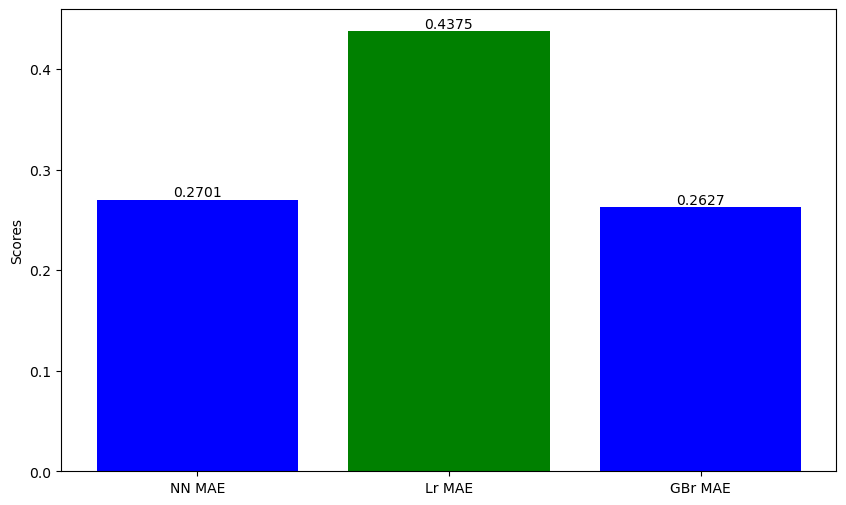

In [93]:
metrics_k = [ 'NN MAE','Lr MAE','GBr MAE']
scores_k = [metrics.mean_absolute_error(y_test, predictions_nn) ,
            metrics.mean_absolute_error(y_test, predictions), 
            metrics.mean_absolute_error(y_test, gbr_pred1)]

plt.figure(figsize=(10, 6))
plt.bar(metrics_k, scores_k, color=['blue', 'green'])
plt.ylabel('Scores')

for i, v in enumerate(scores_k):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')

plt.show()

Были обучены три модели: линейная регрессия, градиентный бустинг и нейросетевая. Лучшие результаты показала нейросеть
